# 실습1 - matplotlib 기본 plot

# **matplotlib 시작하기(loading)**

In [3]:
import matplotlib.pyplot as plt

In [4]:
# 데이터 라이브러리 loading
import pandas as pd
import numpy as np

# **1-1. plot() 기본 예제**

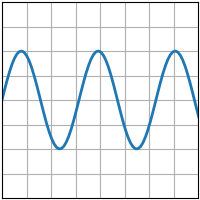

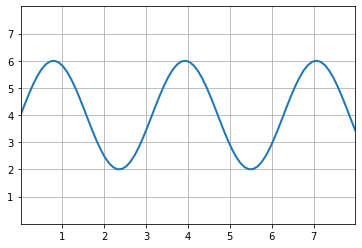

In [5]:
# 데이터 생성
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot 그리기
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.grid()

plt.show()

# **1-2. Advertising data에 적용**

In [6]:
# 데이터 로딩
from google.colab import drive
drive.mount('/content/drive')

ad = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Advertising.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


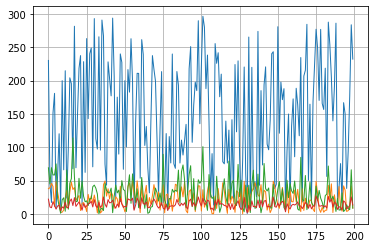

In [8]:
# 데이터 생성
tv = ad["TV"]
radio = ad["Radio"]
news = ad["Newspaper"]
sales = ad["Sales"]

# plot
fig, ax = plt.subplots()

ax.plot(tv, linewidth=1.0)
ax.plot(radio, linewidth=1.0)
ax.plot(news, linewidth=1.0)
ax.plot(sales, linewidth=1.0)

plt.grid()

plt.show()

# **2-1. scatter() 기본 예제**

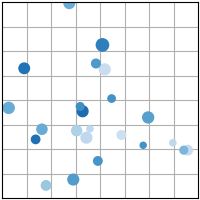

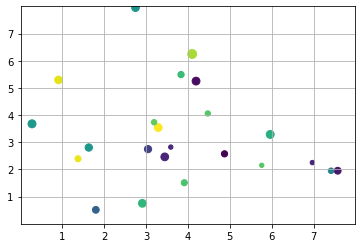

In [9]:
# 데이터 생성
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.grid()

plt.show()

# **2-2. Advertising data에 적용**

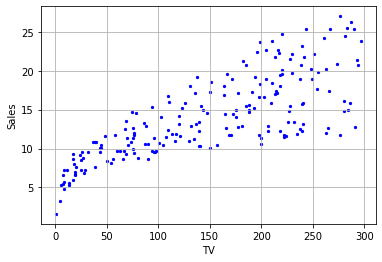

In [10]:
# TV 광고예산과 판매량과의 관계
fig, ax = plt.subplots()

ax.scatter(tv, sales, s=5, c="blue")

ax.set(xlabel=("TV"),
       ylabel=("Sales"))

plt.grid()

plt.show()

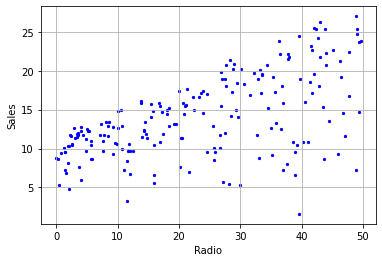

In [11]:
# Radio 광고예산과 판매량과의 관계
fig, ax = plt.subplots()

ax.scatter(radio, sales, s=5, c="blue")

ax.set(xlabel=("Radio"),
       ylabel=("Sales"))

plt.grid()

plt.show()

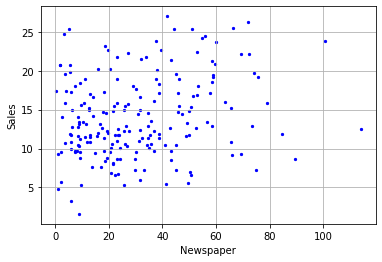

In [12]:
# Newspaper 광고예산과 판매량과의 관계
fig, ax = plt.subplots()

ax.scatter(news, sales, s=5, c="blue")

ax.set(xlabel=("Newspaper"),
       ylabel=("Sales"))

plt.grid()

plt.show()

# 실습2 - matplotlib 통계 관련 plot


# **1-1. hist() 기본 예제**

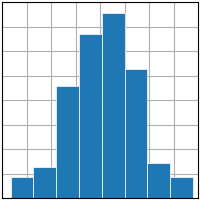

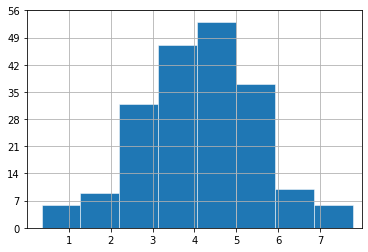

In [13]:
# 데이터 생성
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.grid()

plt.show()

# **1-2. Advertising data에 적용**

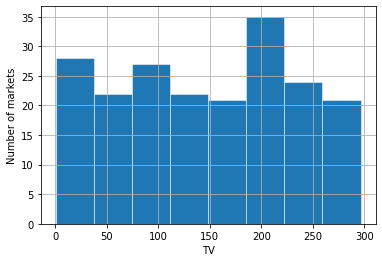

In [14]:
# TV 광고예산의 분포
fig, ax = plt.subplots()

ax.hist(tv, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlabel=("TV"),
       ylabel=("Number of markets"))

plt.grid()

plt.show()

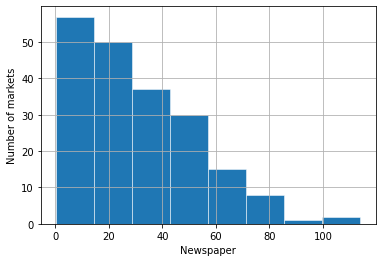

In [15]:
# Newspaper 광고예산의 분포
fig, ax = plt.subplots()

ax.hist(news, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlabel=("Newspaper"),
       ylabel=("Number of markets"))

plt.grid()

plt.show()

# **2-1. boxplot() 기본 예제**

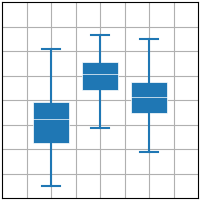

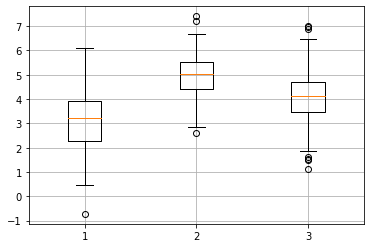

In [16]:
# 데이터 생성
np.random.seed(10)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3)) #D는 array

# plot
fig, ax = plt.subplots()
ax.boxplot(D)

plt.grid()

plt.show()

# **2-2. Advertising data에 적용**

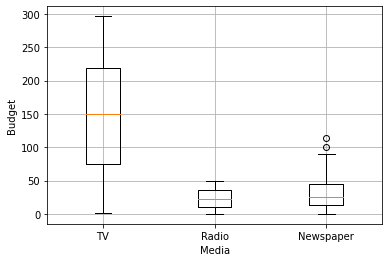

In [17]:
# 3가지 광고매체의 비교
D = [tv, radio, news]

# plot
fig, ax = plt.subplots()
ax.boxplot(D)

ax.set(xlabel=("Media"),
       ylabel=("Budget"))

plt.xticks([1, 2, 3], ['TV', 'Radio', 'Newspaper'])

plt.grid()

plt.show()

# 실습3 - seaborn


# **seaborn 시작하기(loading)**

In [18]:
import seaborn as sns

# **1. relplot() - Advertising data**

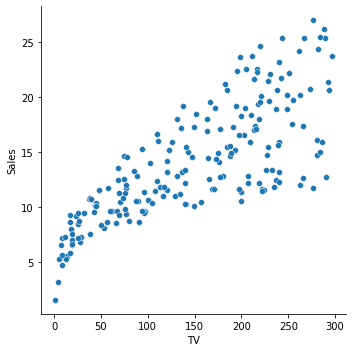

In [19]:
sns.relplot(x=tv, y=sales)

# **2. PairGrid() - Advertising data**

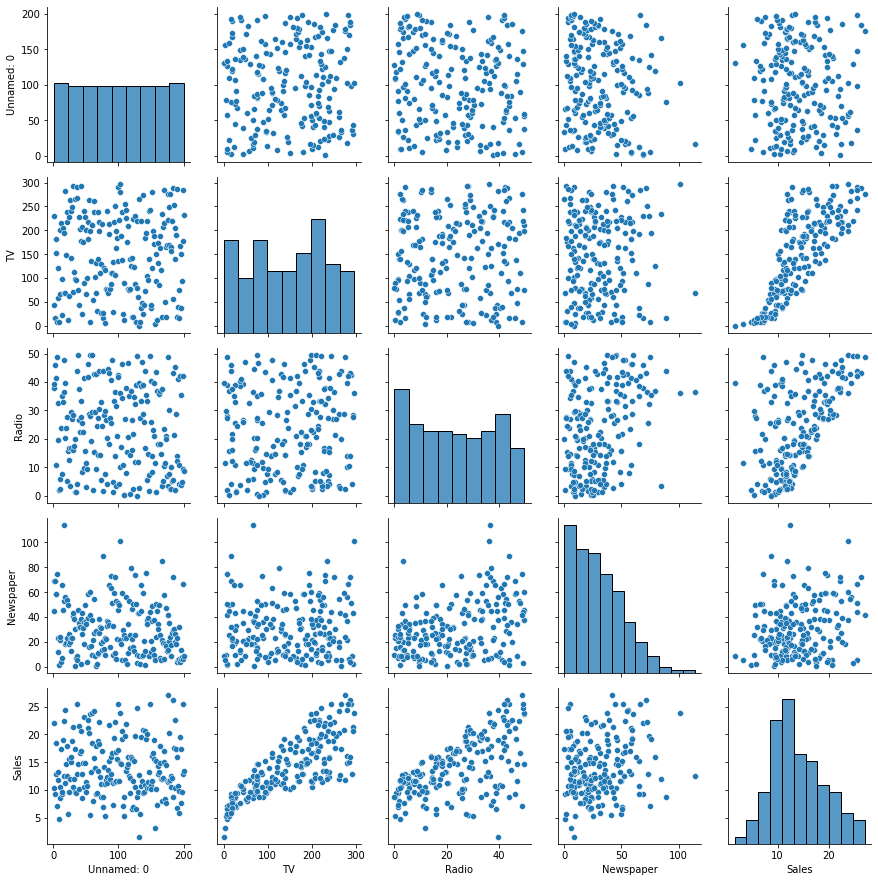

In [20]:
g = sns.PairGrid(ad)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# **3. regression line - Advertising data**

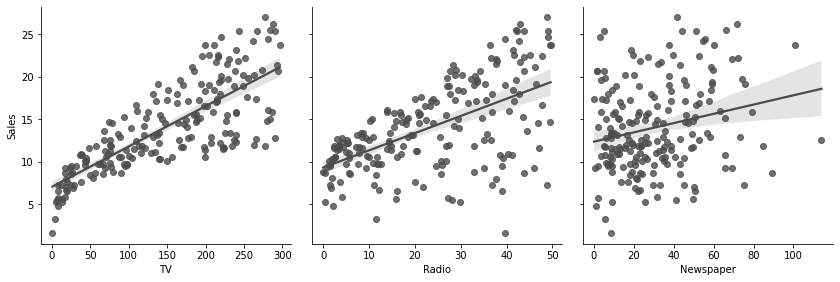

In [21]:
g = sns.PairGrid(ad, y_vars=["Sales"], x_vars=["TV", "Radio", "Newspaper"], height=4)
g.map(sns.regplot, color=".3")